1.import essential libraries 

In [21]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2.Load DataSet

In [22]:
data = pd.read_excel(r"C:\Users\syed9\Downloads\iris (1).xls")


3.basic information about the data

In [23]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [24]:
data.shape

(150, 5)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [26]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [27]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

filling the null values 

In [28]:
data.fillna({'SL':data['SL'].median()},inplace=True)

In [29]:
data.fillna({'SW':data['SW'].median()},inplace=True)

In [30]:
data.fillna({'PL':data['PL'].median()},inplace=True)

In [31]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

STEP - 3 DATA VISUALIZATION

In [32]:
""" 1.univariate analysis 
    - numerical - histogram
    numerical countplot
""" 

num_col = data.select_dtypes(include=['float64']).columns

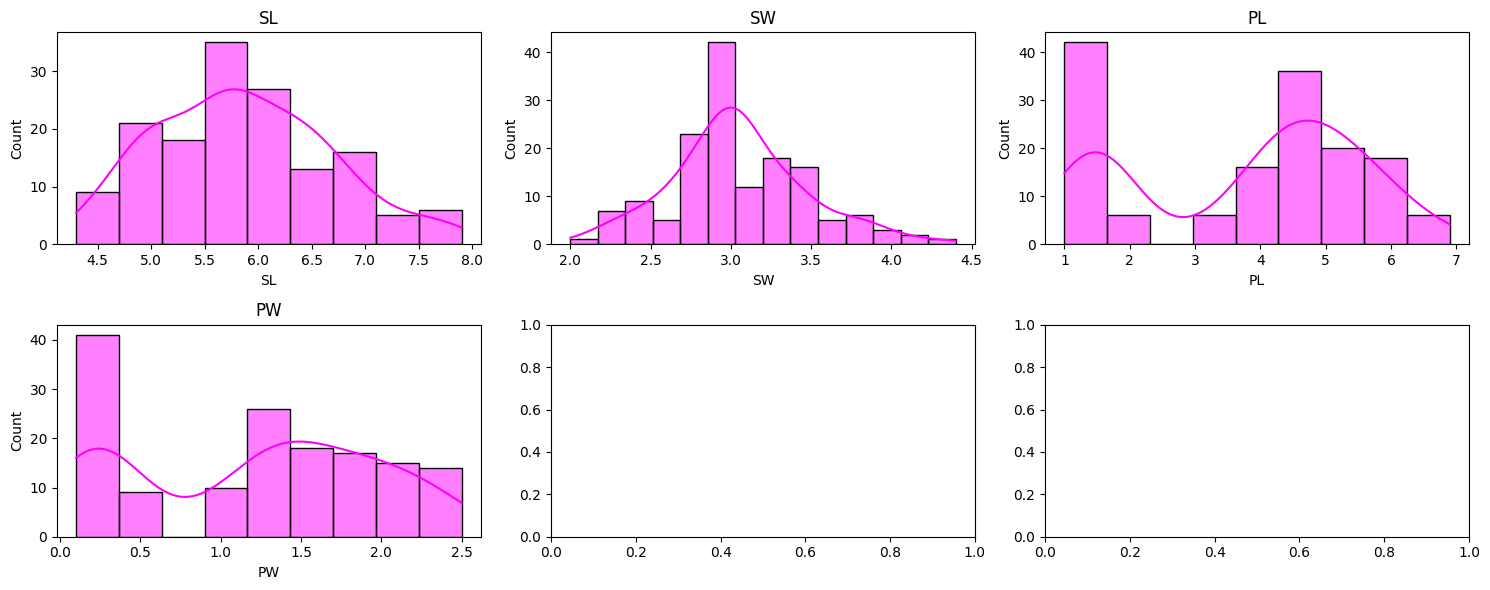

In [33]:
fig,axes = plt.subplots(2,3,figsize = (15,6))

for i, column in enumerate(num_col):
    row,col = divmod(i,3)  # calculate the row number
    sns.histplot(data=data,x = column,kde=True,ax = axes[row][col],color='magenta')
     
    axes[row][col].set_title(column)
     
plt.tight_layout()
plt.show()     

checking for outliwers

<Axes: >

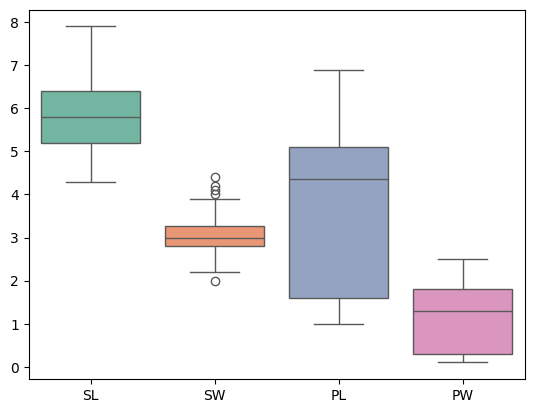

In [34]:

sns.boxplot(data=data  ,palette='Set2')

In [35]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [36]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,5.8,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [37]:
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

In [39]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,5.8,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
std = StandardScaler()

In [42]:
data.loc[:,num_col] = std.fit_transform(data[num_col])

In [43]:
data.head()

,SL,SW,PL,PW,Classification
0,-0.934811,1.076275,-1.380791,-1.312977,Iris-setosa
1,-1.182990,-0.112541,-1.380791,-1.312977,Iris-setosa
2,-0.066181,0.362985,-1.438808,-1.312977,Iris-setosa
3,-1.555260,0.125222,-1.322775,-1.312977,Iris-setosa
4,-1.058900,1.314038,-1.380791,-1.312977,Iris-setosa


In [44]:
data.head

<bound method NDFrame.head of            SL        SW        PL        PW  Classification
0   -0.934811  1.076275 -1.380791 -1.312977     Iris-setosa
1   -1.182990 -0.112541 -1.380791 -1.312977     Iris-setosa
2   -0.066181  0.362985 -1.438808 -1.312977     Iris-setosa
3   -1.555260  0.125222 -1.322775 -1.312977     Iris-setosa
4   -1.058900  1.314038 -1.380791 -1.312977     Iris-setosa
..        ...       ...       ...       ...             ...
145  1.050628 -0.112541  0.823834  1.447956  Iris-virginica
146  0.554268 -1.301358  0.707801  0.922064  Iris-virginica
147  0.802448 -0.112541  0.330694  1.053537  Iris-virginica
148  0.430178  0.838512  0.939866  1.447956  Iris-virginica
149  0.057909 -0.112541  0.765817  0.790591  Iris-virginica

[150 rows x 5 columns]>

In [45]:
x = data.drop('Classification',axis=1)

In [46]:
y = data['Classification']

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
x_train,x_test,y_train,y_text = train_test_split(x,y,random_state=42,test_size=0.2)

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),

}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(x_train, y_train)  # Train model
    y_pred = model.predict(x_test)  # Predict on test data
    accuracy = accuracy_score(y_text, y_pred)  # Evaluate accuracy
    results[name] = accuracy  # Store result

# Print results
for model, acc in results.items():
    print(f"{model}: {acc:.4f}")

# Find the best model
best_model = max(results, key=results.get)
print(f"\nBest Model: {best_model} with Accuracy: {results[best_model]:.4f}")


Logistic Regression: 0.9667
K-Nearest Neighbors: 0.9667
Support Vector Machine: 0.9667
Decision Tree: 1.0000
Random Forest: 1.0000
Gradient Boosting: 1.0000

Best Model: Decision Tree with Accuracy: 1.0000
